# Importing the libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the Dataset

In [18]:
data = pd.read_csv("Mall_Customers.csv")
x = data.iloc[:,[3,4]].values
#y = data.iloc[:,-1].values

In [19]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Using the elbow method to find the optimal number of clusters

C:\Users\Yuvan Jeyan G\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


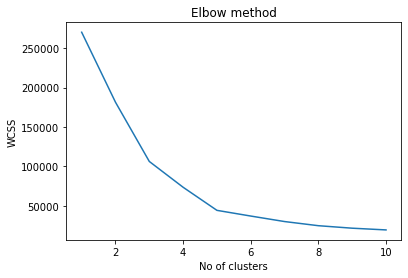

In [26]:
from sklearn.cluster import KMeans
wcss=[] #within cluster sum of square to find the distance between centroid of cluster and other cluster points
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

#    Training the model on K-means dataset

In [27]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)
y_means = kmeans.fit_predict(x)

In [28]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

# Visualizing the clusters

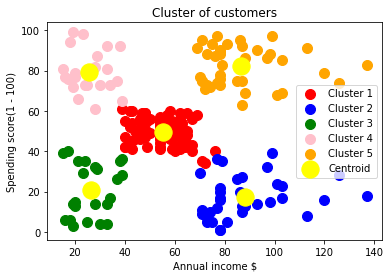

In [29]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],s = 100,c = 'red', label="Cluster 1")
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],s = 100,c = 'blue', label="Cluster 2")
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],s = 100,c = 'green', label="Cluster 3")
plt.scatter(x[y_means == 3,0],x[y_means == 3,1],s = 100,c = 'pink', label="Cluster 4")
plt.scatter(x[y_means == 4,0],x[y_means == 4,1],s = 100,c = 'orange', label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c='yellow', label = "Centroid")
plt.title("Cluster of customers")
plt.xlabel("Annual income $")
plt.ylabel("Spending score(1 - 100)")
plt.legend()
plt.show()